# Convolutional Neural Network

### Importing the libraries

In [ ]:
!pip install --upgrade tensorflow keras Pillow

In [252]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [109]:
tf.__version__

'2.3.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

#### Alterações

* Redução do 'batch_size' para 16
* Adição 'shuffle' para embaralhar as imagens nos batchs durante o treinamento
* Troca formato padrão da imagem para 96x96

In [253]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (96, 96),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle = True,
                                                 seed = True)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [254]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (96, 96),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [255]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.activations import tanh, relu, sigmoid

cnn = Sequential()

### First convolution layer

#### Alterações

* Troca de função de ativação de relu para tangente hiperbolica

In [256]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation=tanh, input_shape=[96, 96, 3]))
cnn.add(MaxPool2D(pool_size=2, strides=2))

### Second convolutional layer

In [257]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation=relu))
cnn.add(MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [258]:
cnn.add(Flatten())

### Step 4 - Full Connection

In [259]:
cnn.add(Dense(units=128, activation=relu))

### Step 5 - Output Layer

In [260]:
cnn.add(Dense(units=1, activation=sigmoid))

## Part 3 - Training the CNN

### Compiling the CNN

In [261]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

#### Alterações

* Diminui quantidade de épocas para 15

In [262]:
train_history = cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
500/500 [==============================] - 51s 103ms/step - loss: 0.6747 - accuracy: 0.5901 - val_loss: 0.6541 - val_accuracy: 0.6400
Epoch 2/15
500/500 [==============================] - 49s 98ms/step - loss: 0.6338 - accuracy: 0.6440 - val_loss: 0.6090 - val_accuracy: 0.6810
Epoch 3/15
500/500 [==============================] - 49s 99ms/step - loss: 0.5994 - accuracy: 0.6802 - val_loss: 0.5984 - val_accuracy: 0.6860
Epoch 4/15
500/500 [==============================] - 49s 99ms/step - loss: 0.5882 - accuracy: 0.6825 - val_loss: 0.5776 - val_accuracy: 0.7160
Epoch 5/15
500/500 [==============================] - 50s 99ms/step - loss: 0.5666 - accuracy: 0.7046 - val_loss: 0.5604 - val_accuracy: 0.7270
Epoch 6/15
500/500 [==============================] - 50s 99ms/step - loss: 0.5356 - accuracy: 0.7320 - val_loss: 0.5574 - val_accuracy: 0.7410
Epoch 7/15
500/500 [==============================] - 50s 100ms/step - loss: 0.5021 - accuracy: 0.7473 - val_loss: 0.5354 - val_accurac

## Gráfico do Aprendizado

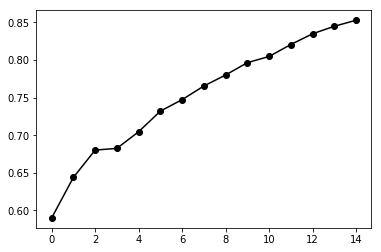

In [265]:
import matplotlib.pyplot as plt

plt.plot(list(train_history.history.values())[1],'k-o')

## Part 4 - Making a single prediction

In [266]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (96, 96))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [267]:
print(prediction)

dog


## Fim